In [82]:
import numpy as np

def is_in_poly(x, y, polygon):
    """
    whether one point is inside a 2-D poly
    :param x: point_x
    :param y: point_y
    :param polygon: array of polygon vertex：k * 2
    :return: true or false
    """
    poly_xs = polygon[:, 0]
    poly_ys = polygon[:, 1]
    odd_cross = False
    for i in range(len(poly_xs)):
        j = i - 1 if i > 0 else len(poly_xs) - 1
        if poly_ys[i] < y <= poly_ys[j] or poly_ys[j] < y <= poly_ys[i]:
            if poly_xs[i] + (y - poly_ys[i]) * (poly_xs[j] - poly_xs[i]) / (poly_ys[j] - poly_ys[i]) < x:  # wont divide 0
                odd_cross = False if odd_cross else True
    return odd_cross


def graph_in_poly(graph, polygon):
    """
    setting pixel to one if the pixel in polygon
    :param graph: a 2-D graph: m * m arraty
    :param polygon: array of polygon vertex：k * 2
    :return: new 2-D array
    """
    
    new_graph = graph
    
    for i in range(graph.shape[0]):
        for j in range(graph.shape[1]):
            if is_in_poly(i,j, polygon):
                new_graph[i, j] = 1
    
    return new_graph

m = 80

graph = np.zeros([m,m])

polygon_array = np.array([[40.1, 40.1], [60.1, 30.1], [20.1, 20.1], [50.1, 30.1]])

new_graph = graph_in_poly(graph, polygon_array)

print(new_graph)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [83]:
new_graph.shape

(80, 80)

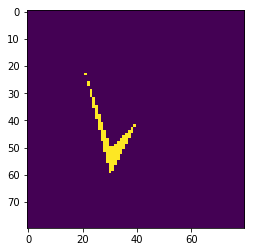

In [84]:
plt.imshow(new_graph)
plt.show()

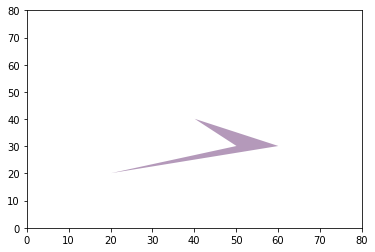

In [87]:
import matplotlib
from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib.collections import PatchCollection
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

polygon = Polygon(polygon_array, True)

fig, ax = plt.subplots()

resolution = 50  # the number of vertices

patches = []

patches.append(polygon)

p = PatchCollection(patches, alpha=0.4)
p.set_array(np.array(colors))
ax.add_collection(p)

plt.xlim(0, m)
plt.ylim(0, m)

plt.show()

In [67]:
def is_in_poly(x, y, poly_xs, poly_ys):
    """
    whether one point is inside a 2-D poly
    :param x: point_x
    :param y: point_y
    :param poly_xs: xs of poly
    :param poly_ys: ys of poly
    :return: true or false
    """
    odd_cross = False
    for i in range(len(poly_xs)):
        j = i - 1 if i > 0 else len(poly_xs) - 1
        if poly_ys[i] < y <= poly_ys[j] or poly_ys[j] < y <= poly_ys[i]:
            if poly_xs[i] + (y - poly_ys[i]) * (poly_xs[j] - poly_xs[i]) / (poly_ys[j] - poly_ys[i]) < x:  # wont divide 0
                odd_cross = False if odd_cross else True
    return odd_cross


def demo():
    """
    test functional
    """
    print("it works", is_in_poly(5, 5, polygon_array[:,0], polygon_array[:,1]))
    
demo()

it works True
